In [ ]:
# 貼前面寫過的來用
import pandas as pd

url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Classification/Diabetes_Data.csv"
data = pd.read_csv(url)
data

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,男生,1
1,66,102,128.1,女生,1
2,59,65,103.9,男生,0
3,46,117,94.8,女生,0
4,45,79,57.8,男生,0
...,...,...,...,...,...
395,72,63,97.1,女生,0
396,22,117,156.7,女生,1
397,31,76,119.0,男生,0
398,36,65,96.3,女生,1


In [ ]:
# 貼前面寫過的來用
data["Gender"] = data["Gender"].map({"男生": 1, "女生": 0})
data

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,1,1
1,66,102,128.1,0,1
2,59,65,103.9,1,0
3,46,117,94.8,0,0
4,45,79,57.8,1,0
...,...,...,...,...,...
395,72,63,97.1,0,0
396,22,117,156.7,0,1
397,31,76,119.0,1,0
398,36,65,96.3,0,1


In [ ]:
# 貼前面寫過的來用
# 分成訓練集與測試集
from sklearn.model_selection import train_test_split
x = data[["Age",	"Weight",	"BloodSugar", "Gender"]]
y = data["Diabetes"]
# 兩成測試集, 固定分割的方式random_state = ?(數字)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 87)
# 原先為Pandas 的形式方便閱讀, 將其用Numpy轉換為矩陣形式方便計算
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# 貼前面寫過的來用
# 用Feature Scaling 做加速, 減少迭代更新到近最低點所需的次數, 功能像是幫各個x 做Normalize
from sklearn.preprocessing import StandardScaler
# 這裡是做標準化Standardization
scaler = StandardScaler() # 創建一名稱為scalar 的類別
scaler.fit(x_train) # 再讓它看過訓練集的特徵資料(.fit)
x_train = scaler.transform(x_train)
# 注意我們不能算測試集的平均值, 變異數, 標準差來做Normalize, 直接使用前面訓練集的
x_test = scaler.transform(x_test)

In [ ]:
# 確認是否能取得到cuda
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# 透過Pytorch 搭建神經網路
from torch import nn
# 定義名為 LogisticRegressionModel 的類別，繼承了 PyTorch 中的 nn.Module 類別
class LogisticRegressionModel(nn.Module): # 這表示 LogisticRegressionModel 是一個神經網路模型，可以使用 PyTorch 提供的模型相關功能
  def __init__(self): # 這是 LogisticRegressionModel 類別的初始化方法
    # 呼叫父類別（nn.Module）的初始化方法
    super().__init__() # super() 是一個內建函數，用來取得父類別的物件，這樣可以確保父類別的初始化方法被正確呼叫
    # 邏輯回歸僅是先做一個多元線性回歸, 再經過Sigmoid Function
    self.linear_layer = nn.Linear(in_features=4, out_features=1, dtype=torch.float64) # 我們先創建一個線性層 (Linear Layer)

    # Sigmoid Function
    # https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html#torch.nn.Sigmoid
    self.sigmoid = nn.Sigmoid()

  # 在PyTorch 中，所有的神經網路模型都需要實作一個名為forward的方法，該方法描述了輸入資料如何透過網路層進行計算，最終得到輸出
  def forward(self, x):
    return self.sigmoid(self.linear_layer(x)) # 先經過線性層, 再做Sigmoid Function, 最後做回傳

In [ ]:
# 創建模型
torch.manual_seed(87) # 固定隨機的數值
model = LogisticRegressionModel()
model= model.to(device) # 移至GPU 上計算
# 查看有哪些參數並列成表
model, model.state_dict() # 也可以用list(model.parameters())

(LogisticRegressionModel(
   (linear_layer): Linear(in_features=4, out_features=1, bias=True)
   (sigmoid): Sigmoid()
 ),
 OrderedDict([('linear_layer.weight',
               tensor([[-0.4710,  0.1380, -0.1459, -0.1397]], device='cuda:0',
                      dtype=torch.float64)),
              ('linear_layer.bias',
               tensor([-0.4544], device='cuda:0', dtype=torch.float64))]))

In [ ]:
# 將numpy 的array 格式轉換為torch 的tensor 格式
x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [ ]:
# 設定到GPU 上訓練模型
x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [ ]:
model(x_train)
# x_train.dtype, model.linear_layer.weight.dtype

tensor([[0.3561],
        [0.4317],
        [0.5761],
        [0.3695],
        [0.2745],
        [0.3166],
        [0.2497],
        [0.5588],
        [0.1855],
        [0.3941],
        [0.2669],
        [0.3085],
        [0.4144],
        [0.5494],
        [0.2663],
        [0.3486],
        [0.5688],
        [0.6084],
        [0.2667],
        [0.2576],
        [0.4962],
        [0.5593],
        [0.4381],
        [0.2821],
        [0.3858],
        [0.2126],
        [0.4350],
        [0.3913],
        [0.5438],
        [0.3691],
        [0.2201],
        [0.1632],
        [0.4455],
        [0.5806],
        [0.3363],
        [0.3519],
        [0.5674],
        [0.1648],
        [0.3538],
        [0.4337],
        [0.2374],
        [0.4500],
        [0.5481],
        [0.3537],
        [0.5587],
        [0.5103],
        [0.2150],
        [0.2725],
        [0.3246],
        [0.2993],
        [0.5266],
        [0.2539],
        [0.3375],
        [0.5671],
        [0.6292],
        [0

In [ ]:
# Debug 矩陣大小與資料型態問題
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_train = y_train.type(torch.float64) # 或y_train.type(torch.double)
y_test = y_test.type(torch.float64)

In [ ]:
# Cost Function, Binary Cross Entropy (BCE)
# https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss
cost_fn = nn.BCELoss()
y_pred = model(x_train)
cost = cost_fn(y_pred, y_train)

# 原本
print(model.state_dict()) # 印出模型參數
print(cost) # 印出cost

# Optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01) # params:傳入參數, lr:Learning Rate
optimizer.zero_grad() # 因為會做疊加, 所以要確保每次計算前歸零
cost.backward() # 讓它自動微分來計算梯度
optimizer.step() # 更新參數

y_pred = model(x_train)
cost = cost_fn(y_pred, y_train)
# 後來
print(model.state_dict()) # 印出模型參數
print(cost) # 印出cost

OrderedDict([('linear_layer.weight', tensor([[-0.4710,  0.1380, -0.1459, -0.1397]], device='cuda:0',
       dtype=torch.float64)), ('linear_layer.bias', tensor([-0.4544], device='cuda:0', dtype=torch.float64))])
tensor(0.7056, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward0>)
OrderedDict([('linear_layer.weight', tensor([[-0.4697,  0.1394, -0.1422, -0.1394]], device='cuda:0',
       dtype=torch.float64)), ('linear_layer.bias', tensor([-0.4552], device='cuda:0', dtype=torch.float64))])
tensor(0.7038, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyBackward0>)


In [ ]:
# 貼前面寫過的來用
# 讓它不斷更新參數

# Epoch 代表看過所有訓練集一次
epochs = 10000

# 記錄訓練集與測試集的cost
train_cost_hist = []
test_cost_hist = []


# 新增預測準確性(Accuarcy) 的部分
train_acc_hist = []
test_acc_hist = []


# 用上方部分, 建立for 迴圈執行上方程式
for epoch in range(epochs):

  # 養成好習慣, 需寫上model.train() 代表訓練階段
  model.train()
  y_pred = model(x_train)
  train_cost = cost_fn(y_pred, y_train)
  # 記錄訓練集的cost
  train_cost_hist.append(train_cost.cpu().detach().numpy()) # detach() 讓它不追蹤梯度並轉成numpy array 格式 (因為無法直接輸出tensor格式)


  # 新增對值做四捨五入, 並計算準確性(Accuarcy)
  train_acc = (torch.round(y_pred)==y_train).sum() / len(y_train) * 100
  train_acc_hist.append(train_acc.cpu().detach().numpy())


  optimizer.zero_grad() # 因為會做疊加, 所以要確保每次計算前歸零
  train_cost.backward() # 讓它自動微分來計算梯度
  optimizer.step() # 更新參數

  # 看每次參數的更新在測試集上的表現如何
  # 需寫上model.eval() 代表測試階段
  model.eval()
  with torch.inference_mode(): # 由於是測試集的程式碼無需追蹤梯度，加這行可以提升運算速度
    test_pred = model(x_test)
    test_cost = cost_fn(test_pred, y_test)
    # 記錄測試集的cost
    test_cost_hist.append(test_cost.cpu().detach().numpy()) # detach() 讓它不追蹤梯度並轉成numpy array 格式 (因為無法直接輸出tensor格式)


    # 新增對值做四捨五入, 並計算準確性(Accuarcy)
    test_acc = (torch.round(test_pred)==y_test).sum() / len(y_test) * 100
    test_acc_hist.append(test_acc.cpu().detach().numpy())


  if epoch%1000==0:
    print(f"Epoch: {epoch:5}, Train Acc: {train_acc: .4e}%, Test Acc: {test_acc: .4e}%") # 改成印出正確率

Epoch:     0, Train Acc:  5.4688e+01%, Test Acc:  5.1250e+01%
Epoch:  1000, Train Acc:  8.8438e+01%, Test Acc:  8.5000e+01%
Epoch:  2000, Train Acc:  8.8750e+01%, Test Acc:  8.5000e+01%
Epoch:  3000, Train Acc:  9.0000e+01%, Test Acc:  8.5000e+01%
Epoch:  4000, Train Acc:  8.9688e+01%, Test Acc:  8.5000e+01%
Epoch:  5000, Train Acc:  8.9688e+01%, Test Acc:  8.6250e+01%
Epoch:  6000, Train Acc:  8.9688e+01%, Test Acc:  8.8750e+01%
Epoch:  7000, Train Acc:  8.9688e+01%, Test Acc:  8.8750e+01%
Epoch:  8000, Train Acc:  8.9375e+01%, Test Acc:  8.8750e+01%
Epoch:  9000, Train Acc:  8.9375e+01%, Test Acc:  9.0000e+01%


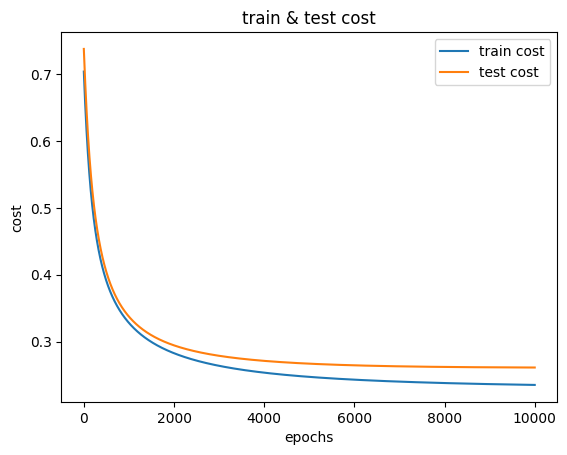

In [ ]:
# 貼前面寫過的來用
# 畫Cost 圖
import matplotlib.pyplot as plt
plt.plot(range(0, 10000), train_cost_hist, label="train cost")
plt.plot(range(0, 10000), test_cost_hist, label="test cost")
plt.title("train & test cost")
plt.xlabel("epochs")
plt.ylabel("cost")
plt.legend()
plt.show()

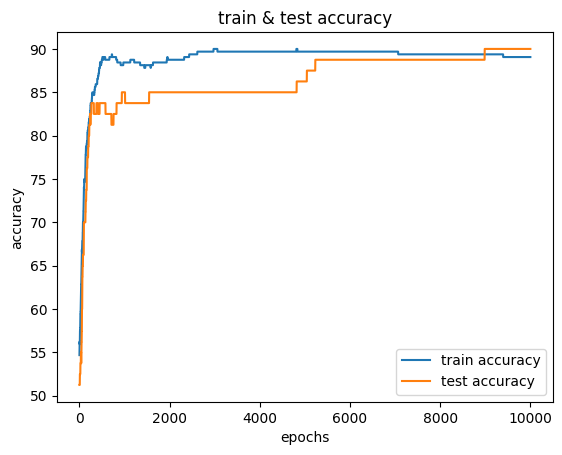

In [ ]:
# 貼前面寫過的來用
# 畫Accuracy 圖
import matplotlib.pyplot as plt
plt.plot(range(0, 10000), train_acc_hist, label="train accuracy")
plt.plot(range(0, 10000), test_acc_hist, label="test accuracy")
plt.title("train & test accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
model.state_dict()

OrderedDict([('linear_layer.weight',
              tensor([[-0.1825, -0.1210,  3.6459, -0.0998]], device='cuda:0',
                     dtype=torch.float64)),
             ('linear_layer.bias',
              tensor([-1.8236], device='cuda:0', dtype=torch.float64))])

In [ ]:
model.eval()
with torch.inference_mode():
  y_pred = model(x_test)
# 四捨五入預測是(T) 或否(F) 並透過測試集算出準確性(Accuarcy)
(torch.round(y_pred)==y_test).sum() / len(y_test) * 100

tensor(90., device='cuda:0')